In [1]:
#Import required libraries
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import joblib
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import time
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score

In [2]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# Google Drive path where coursework material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'My_Computer_vision/CV_Coursework/CW_Folder_PG_template/CW_Folder_PG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['test_functions.ipynb', 'Models', 'Video', 'CW_Dataset', 'Code', 'Test_functions_video.ipynb', 'Copy of test_functions.ipynb', 'FaceDetectionVideo_using_CNN_MObilenet.ipynb', 'test_functions_v3.ipynb', 'Report template.docx']


In [4]:
#Magic comand to automatic loading of modules
#Adapted from lab 5
%load_ext autoreload
%autoreload 2

In [5]:
#import modules located in code directory
import sys
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'Code')
sys.path.append(CODE_PATH)

In [6]:
#extracted data from zipped file to copy in Colab
#Adapted from lab 6
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/CV2024_CW_Dataset.zip')

  # Copy it to Colab
!cp '{zip_path}' .
  # Unzip it
!yes|unzip -q CV2024_CW_Dataset.zip

# Delete zipped version from Colab (not from Drive)
!rm CV2024_CW_Dataset.zip

In [8]:
#import required functions from Load_data python script to load data
from Load_data import FileNameList,Fetch_text_data, Fetch_images
#FileNameList is the function to collect all the filnames (images and labels)
#Fetch_text_data is a funtion to import all label names from labels folder into the list
#Fetch_images is a function to import all the images from images folder

In [9]:
test_label_data = Fetch_text_data('test/labels',FileNameList('test/labels','.txt')) #import test labels
train_label_data = Fetch_text_data('train/labels',FileNameList('train/labels','.txt')) # import train labels
test_images_data = Fetch_images('test/images',FileNameList('test/images', '.jpeg')) #import test images
train_images_data = Fetch_images('train/images',FileNameList('train/images', '.jpeg')) #import train images

In [ ]:
#to see how data is distributed
print(f'Train labels distribution: {Counter(train_label_data)}') #data is imbalance
print(f'Test labels distribution: {Counter(test_label_data)}') #data is imbalance

Train labels distribution: Counter({'1': 1940, '0': 376, '2': 78})
Test labels distribution: Counter({'1': 388, '0': 51, '2': 19})


In [10]:
#import required functions from the preprocessing python script
from preprocessing import ResizeAndHOGTransformation
#ResizeAndHOGTransformation is a function to resize the images and perform HOG transformation of to get the required features of the images which
#later will be used to train the model


In [11]:
train_images,y_label_train, HOG_desctriptors_train, HOG_images_train = ResizeAndHOGTransformation(train_images_data,train_label_data,128,128)

In [ ]:
#Initially experimented with imbalanced data
#balacing data using oversampling technique
# x_resampled_imageHOG, y_resampled_label = SMOTE().fit_resample(HOG_desctriptors_train, y_label_train)

In [ ]:
# Counter(y_resampled_label) #to verify if data balanced

In [ ]:
#Logrithmic C values
#reffered from here : https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
x =np.power(2, np.arange(-3,5, dtype= float ))
x

array([ 0.125,  0.25 ,  0.5  ,  1.   ,  2.   ,  4.   ,  8.   , 16.   ])

In [ ]:
#Logrithmic gamma value
y = np.power(2, np.arange(-5,-1, dtype= float ))
y

array([0.03125, 0.0625 , 0.125  , 0.25   ])

In [ ]:
#fine grid values
# x =np.power(2, np.arange(1, 5.25, 0.25))
# x

In [ ]:
# y =np.power(2, np.arange(-7, -2.75, 0.25))
# y
# param_grid = {
#     'C': np.power(2, np.arange(1, 2, 0.25)),
#     'kernel': ['rbf', 'poly'],
#     'gamma': np.power(2, np.arange(-2, -1, 0.25)),
#     'degree': [2, 3]  # Degree values for 'poly' kernel
# }

array([0.0078125 , 0.00929068, 0.01104854, 0.01313901, 0.015625  ,
       0.01858136, 0.02209709, 0.02627801, 0.03125   , 0.03716272,
       0.04419417, 0.05255603, 0.0625    , 0.07432544, 0.08838835,
       0.10511205, 0.125     ])

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

#perform Grid search ( Randomized grid search was perfomed as SVM is computattionally expensive)
#assign the list of hyperparameter for grid search
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
param_grid = {
    'C': np.power(2, np.arange(-1,5, dtype= float )),
    'kernel': ['rbf', 'poly'],
    'gamma': np.power(2, np.arange(-2,-1, dtype= float )),
    'degree': [2, 3, 4]  # Degree values for 'poly' kernel
}
# Define the hyperparameter grid for fine grid search
# param_grid = {
#     'C': np.power(2, np.arange(1, 2, 0.25)),
#     'kernel': ['poly'],
#     'gamma': np.power(2, np.arange(-2, -1.5, 0.25)),
#     'degree': [2, 3]  # Degree values for 'poly' kernel
# }
# Create the grid search object
grid_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    n_iter= 10

)

# Fit the grid search object to the training data
# grid_search.fit(x_resampled_imageHOG, y_resampled_label)
grid_search.fit(HOG_desctriptors_train, y_label_train)


# Print the best hyperparameters and best score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters:  {'kernel': 'poly', 'gamma': 0.25, 'degree': 4, 'C': 16.0}
Best score:  0.8934818878241805


In [ ]:
# from svm_model import svm_model
#train the model with balanced data
# svm_model.fit(x_resampled_imageHOG, y_resampled_label)

SVC(C=16, gamma=0.25)

In [ ]:
#train final model
from svm_model import svm_model
start_time = time.time() #moitor time to train the model
svm_model.fit(HOG_desctriptors_train, y_label_train) #train the model for the hyperparameter obtained by Grid dearch
end_time = time.time()
elapsed_time = end_time- start_time
print(f"Training completed in {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s")

Training completed in 0m 5s


In [ ]:
#Resize and HOG transformation of Test data
test_images, y_label_test, HOG_desctriptors_test, HOG_images_test = ResizeAndHOGTransformation(test_images_data,test_label_data,128,128)

In [ ]:
start_time = time.time()
y_pred = svm_model.predict(HOG_desctriptors_test) #predict test data
end_time = time.time()
elapsed_time = end_time- start_time
print(f"testing completed in {elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s") #this line adapted from lab

testing completed in 0m 1s


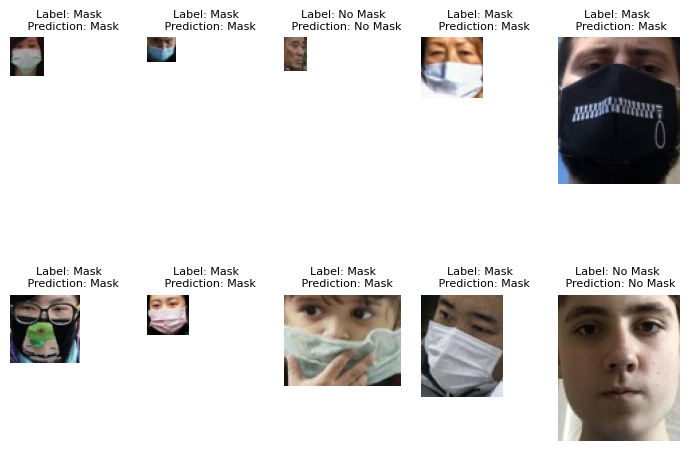

In [ ]:
#Partially adapted from Lab 5
#display images with their true and predicted labes
images, label, y = shuffle(test_images, y_label_test, y_pred)
fig, axes = plt.subplots(2, 5, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()
dict = {1: 'Mask', 2: 'Incorrect Mask', 0: 'No Mask'}


for i in range(10):
    ax[i].imshow(images[i])
    ax[i].set_title(f'Label: {dict[label[i]]} \n Prediction: {dict[y[i]]}', fontsize =8)
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

In [ ]:
#save the model
#joblib.dump(svm_model, 'drive/My Drive/My_Computer_vision/CV_Coursework/CW_Folder_PG_template/CW_Folder_PG/Models/svm_model_hog')

['drive/My Drive/My_Computer_vision/CV_Coursework/CW_Folder_PG_template/CW_Folder_PG/Models/svm_model_hog']

In [ ]:
#show performance parameters
#adapted from lab 5
print(f"""Classification report for classifier {svm_model}:
      {metrics.classification_report(y_label_test, y_pred)}\n""")

Classification report for classifier SVC(class_weight='balanced', gamma=0.25, kernel='poly'):
                    precision    recall  f1-score   support

           0       0.75      0.59      0.66        51
           1       0.92      0.97      0.95       388
           2       0.67      0.32      0.43        19

    accuracy                           0.90       458
   macro avg       0.78      0.63      0.68       458
weighted avg       0.89      0.90      0.89       458




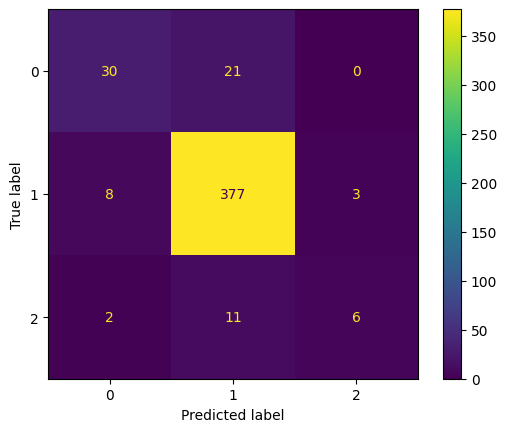

In [ ]:
#confustion matrix to compare true and predicted labels differences
metrics.ConfusionMatrixDisplay.from_predictions(y_label_test, y_pred)
plt.show()

In [ ]:
#print accuracy and weighted Precision, recall and F1 score
print(f'Accuracy: {accuracy_score(y_label_test, y_pred)}')
print(f'F1 score: {f1_score(y_label_test, y_pred, average="weighted")}')
print(f'recall: {recall_score(y_label_test, y_pred,average="weighted")}')
print(f'precision:{precision_score(y_label_test, y_pred,average="weighted")}')

Accuracy: 0.9017467248908297
F1 score: 0.8926544326241882
recall: 0.9017467248908297
precision:0.8920517433439034


In [ ]:
#_________________________________End SVM Model___________________________________________________________